# Determining the historic electricity price for Czechia
By: Ilisa Goenka and Shafin Shabir


### Copied from SVK tryouts.ipynb

In [1]:
import re

import pypsa
import matplotlib.pyplot as plt
from icecream import ic
import os
from os.path import normpath, exists
os.path.isdir("/pypsa-eur")
os. getcwd()
import pandas as pd

In [ ]:
networkdir ="E:\\Cerge-ei\\RA - electricity project\\pypsa-eur_v2\\results\\networks\\"
networkdir_SVK = "/home/slvst/PycharmProjects/pypsa-eur/networks"
file_path = os.path.join(networkdir_SVK,"elec_s_212_ec_lv1_1H.nc")
n= pypsa.Network(file_path)

In [2]:
n= pypsa.Network("E:\\Cerge-ei\\RA - electricity project\\pypsa-eur_v2\\results\\networks\\elec_s_20_ec_lv1_1H.nc")

INFO:pypsa.io:Imported network elec_s_20_ec_lv1_1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


(<matplotlib.collections.PatchCollection at 0x2c1e39f8280>,
 <matplotlib.collections.LineCollection at 0x2c1e3be3490>)

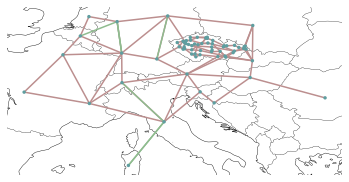

In [3]:
n.plot()

## Determining the prices
Understanding the components of the network

In [4]:
list(n.components)

['Network',
 'SubNetwork',
 'Bus',
 'Carrier',
 'GlobalConstraint',
 'Line',
 'LineType',
 'Transformer',
 'TransformerType',
 'Link',
 'Load',
 'Generator',
 'StorageUnit',
 'Store',
 'ShuntImpedance']

In [5]:
list(n.buses_t)

['v_mag_pu_set', 'p', 'q', 'v_mag_pu', 'v_ang', 'marginal_price']

Extracting the demand and marginal price of electricity over time from the solved network.

In [6]:
demand = n.loads_t.p #For the demand
demand

Load,AT0 0,BE0 0,CH0 0,CZ0 0,CZ0 1,CZ0 11,CZ0 12,CZ0 13,CZ0 14,CZ0 15,...,FR0 2,HR0 0,HU0 0,IT0 0,IT1 0,NL0 0,PL0 0,RO0 0,SI0 0,SK0 0
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5457.339733,8542.0,6536.842169,227.554050,164.143253,192.137807,92.039991,139.872254,229.767275,414.438189,...,23156.813029,1732.0,3986.0,22243.988910,1339.263767,11194.0,14466.59,5856.0,1447.860267,2744.0
2019-01-01 01:00:00,5240.053308,8077.0,6684.511474,225.328499,162.537880,190.258638,91.139811,138.504259,227.520078,410.384852,...,22480.553137,1623.0,3733.0,21039.226736,1274.949086,10933.0,13773.58,5675.0,1390.016692,2679.0
2019-01-01 02:00:00,4964.948178,7823.0,6890.422207,219.418546,158.274809,185.268503,88.749381,134.871546,221.552644,399.621210,...,21176.419921,1534.0,3554.0,19731.975700,1197.010160,10667.0,13406.20,5570.0,1322.361822,2608.0
2019-01-01 03:00:00,4917.387630,7636.0,6817.296461,217.726037,157.053939,183.839414,88.064803,133.831200,219.843674,396.538688,...,20344.631775,1488.0,3499.0,18956.857026,1149.975337,10413.0,13216.30,5524.0,1293.472370,2602.0
2019-01-01 04:00:00,5072.192551,7617.0,6697.649025,218.280721,157.454054,184.307768,88.289159,134.172152,220.403753,397.548920,...,20193.327744,1496.0,3518.0,18995.737805,1149.585503,10441.0,13126.40,5508.0,1327.827449,2594.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,6292.913281,9369.0,6918.676941,250.724145,180.856710,211.701736,101.411723,154.114381,253.162727,456.637273,...,24873.384134,2359.0,4510.0,28853.907674,1663.550155,12799.0,16998.24,7066.0,1822.276719,3080.0
2019-12-31 20:00:00,5995.426716,9105.0,6641.750981,248.159532,179.006758,209.536276,100.374400,152.537971,250.573169,451.966410,...,23908.724936,2252.0,4504.0,26350.726868,1536.257136,12065.0,16239.38,6766.0,1695.033284,2986.0
2019-12-31 21:00:00,6054.177981,9346.0,6412.251168,243.290814,175.494770,205.425320,98.405124,149.545282,245.657098,443.099143,...,24490.515814,2112.0,4529.0,24641.031873,1467.045674,11641.0,15784.00,6564.0,1630.382019,2965.0


In [7]:
price = n.buses_t.marginal_price #For the Marginal Price
price

Bus,AT0 0,BE0 0,CH0 0,CZ0 0,CZ0 1,CZ0 10,CZ0 11,CZ0 12,CZ0 13,CZ0 14,...,FR0 2,HR0 0,HU0 0,IT0 0,IT1 0,NL0 0,PL0 0,RO0 0,SI0 0,SK0 0
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,27.822770,28.015639,28.007113,25.823517,25.685479,28.862607,28.125899,28.281667,26.745836,23.191961,...,27.974750,27.855708,27.773642,28.207823,28.207823,28.065228,28.206587,27.773642,27.893892,27.670375
2019-01-01 01:00:00,27.628361,27.698828,27.758655,26.039612,26.567131,28.949668,28.196203,28.363417,26.860654,23.340340,...,27.639929,27.507188,27.323791,28.207823,28.207823,27.756906,27.095534,27.323791,27.592521,26.993830
2019-01-01 02:00:00,23.876473,23.131471,23.905653,22.684422,23.089561,24.771749,24.212277,24.338624,23.235647,20.595904,...,22.732725,24.828861,24.109860,28.207823,28.206933,23.487814,23.435027,24.109860,25.163405,23.543120
2019-01-01 03:00:00,23.591426,22.784469,23.612924,22.429514,22.825355,24.454335,23.909601,24.032843,22.960240,20.387397,...,22.359903,24.625377,23.865683,28.207823,28.206933,23.163473,23.156922,23.865683,24.978854,23.280955
2019-01-01 04:00:00,23.591426,22.784469,23.612924,22.429514,22.825355,24.454335,23.909601,24.032843,22.960240,20.387397,...,22.359903,24.625377,23.865683,28.207823,28.206933,23.163473,23.156922,23.865683,24.978854,23.280955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,28.200617,28.205962,28.205307,28.176462,28.176454,28.218711,28.208054,28.210351,28.188644,28.138121,...,28.205846,28.216012,28.206915,28.207823,28.207823,28.206256,28.206587,28.206915,28.220245,28.201448
2019-12-31 20:00:00,27.783624,28.115324,28.030360,25.874955,25.764196,28.894607,28.154367,28.311665,26.777575,23.220800,...,28.060224,28.207894,27.922904,28.207823,28.207823,28.206256,28.206587,27.922904,28.340497,27.722084
2019-12-31 21:00:00,27.774850,28.130830,28.008709,25.869174,25.755397,28.888245,28.148008,28.305296,26.771538,23.216121,...,28.092369,28.207894,27.920105,28.207823,28.207823,28.206256,28.206587,27.920105,28.341799,27.719658


In [8]:
price.sort_index(axis=1)

Bus,AT0 0,BE0 0,CH0 0,CZ0 0,CZ0 1,CZ0 10,CZ0 11,CZ0 12,CZ0 13,CZ0 14,...,FR0 2,HR0 0,HU0 0,IT0 0,IT1 0,NL0 0,PL0 0,RO0 0,SI0 0,SK0 0
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,27.822770,28.015639,28.007113,25.823517,25.685479,28.862607,28.125899,28.281667,26.745836,23.191961,...,27.974750,27.855708,27.773642,28.207823,28.207823,28.065228,28.206587,27.773642,27.893892,27.670375
2019-01-01 01:00:00,27.628361,27.698828,27.758655,26.039612,26.567131,28.949668,28.196203,28.363417,26.860654,23.340340,...,27.639929,27.507188,27.323791,28.207823,28.207823,27.756906,27.095534,27.323791,27.592521,26.993830
2019-01-01 02:00:00,23.876473,23.131471,23.905653,22.684422,23.089561,24.771749,24.212277,24.338624,23.235647,20.595904,...,22.732725,24.828861,24.109860,28.207823,28.206933,23.487814,23.435027,24.109860,25.163405,23.543120
2019-01-01 03:00:00,23.591426,22.784469,23.612924,22.429514,22.825355,24.454335,23.909601,24.032843,22.960240,20.387397,...,22.359903,24.625377,23.865683,28.207823,28.206933,23.163473,23.156922,23.865683,24.978854,23.280955
2019-01-01 04:00:00,23.591426,22.784469,23.612924,22.429514,22.825355,24.454335,23.909601,24.032843,22.960240,20.387397,...,22.359903,24.625377,23.865683,28.207823,28.206933,23.163473,23.156922,23.865683,24.978854,23.280955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,28.200617,28.205962,28.205307,28.176462,28.176454,28.218711,28.208054,28.210351,28.188644,28.138121,...,28.205846,28.216012,28.206915,28.207823,28.207823,28.206256,28.206587,28.206915,28.220245,28.201448
2019-12-31 20:00:00,27.783624,28.115324,28.030360,25.874955,25.764196,28.894607,28.154367,28.311665,26.777575,23.220800,...,28.060224,28.207894,27.922904,28.207823,28.207823,28.206256,28.206587,27.922904,28.340497,27.722084
2019-12-31 21:00:00,27.774850,28.130830,28.008709,25.869174,25.755397,28.888245,28.148008,28.305296,26.771538,23.216121,...,28.092369,28.207894,27.920105,28.207823,28.207823,28.206256,28.206587,27.920105,28.341799,27.719658


Since we only want Czechia, we look extract the column index for Czechia. And only look at that data.

In [9]:
c_start= price.columns.get_loc("CZ0 0")

In [10]:
c_end= price.columns.get_loc("CZ0 9")

In [11]:
price_cz = price.iloc[:,c_start:c_end+1]
price_cz #price data for Czech Republic

Bus,CZ0 0,CZ0 1,CZ0 10,CZ0 11,CZ0 12,CZ0 13,CZ0 14,CZ0 15,CZ0 16,CZ0 17,...,CZ0 44,CZ0 45,CZ0 46,CZ0 47,CZ0 48,CZ0 5,CZ0 6,CZ0 7,CZ0 8,CZ0 9
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,25.823517,25.685479,28.862607,28.125899,28.281667,26.745836,23.191961,26.468527,26.035519,24.038152,...,27.242715,28.711241,25.347533,12.29808,25.268868,26.625855,28.788454,29.126872,22.480634,22.420918
2019-01-01 01:00:00,26.039612,26.567131,28.949668,28.196203,28.363417,26.860654,23.340340,26.637569,26.198424,24.231019,...,27.376843,28.806615,25.703763,12.29808,25.673188,26.605734,28.875537,29.222524,22.593754,22.530980
2019-01-01 02:00:00,22.684422,23.089561,24.771749,24.212277,24.338624,23.235647,20.595904,23.068459,22.741304,21.273392,...,23.671487,24.668819,22.418677,12.29808,22.393575,23.132374,24.720004,24.979339,20.028431,19.980698
2019-01-01 03:00:00,22.429514,22.825355,24.454335,23.909601,24.032843,22.960240,20.387397,22.797299,22.478652,21.048688,...,23.389975,24.354453,22.169095,12.29808,22.144408,22.868488,24.404290,24.656966,19.833532,19.786943
2019-01-01 04:00:00,22.429514,22.825355,24.454335,23.909601,24.032843,22.960240,20.387397,22.797299,22.478652,21.048688,...,23.389975,24.354453,22.169095,12.29808,22.144408,22.868488,24.404290,24.656966,19.833532,19.786943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,28.176462,28.176454,28.218711,28.208054,28.210351,28.188644,28.138121,28.184903,28.178707,28.150398,...,28.195897,28.216578,28.169929,27.98209,28.168920,28.187474,28.217618,28.222504,28.127812,28.126946
2019-12-31 20:00:00,25.874955,25.764196,28.894607,28.154367,28.311665,26.777575,23.220800,26.503103,26.069181,24.072155,...,27.279199,28.743541,25.399986,12.29808,25.322453,26.675583,28.819864,29.159785,22.505327,22.445254
2019-12-31 21:00:00,25.869174,25.755397,28.888245,28.148008,28.305296,26.771538,23.216121,26.497070,26.063310,24.066965,...,27.272622,28.737134,25.393680,12.29808,25.315944,26.670687,28.813370,29.153221,22.501071,22.441033


In [12]:
demand.sort_index(axis=1)

Load,AT0 0,BE0 0,CH0 0,CZ0 0,CZ0 1,CZ0 11,CZ0 12,CZ0 13,CZ0 14,CZ0 15,...,FR0 2,HR0 0,HU0 0,IT0 0,IT1 0,NL0 0,PL0 0,RO0 0,SI0 0,SK0 0
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5457.339733,8542.0,6536.842169,227.554050,164.143253,192.137807,92.039991,139.872254,229.767275,414.438189,...,23156.813029,1732.0,3986.0,22243.988910,1339.263767,11194.0,14466.59,5856.0,1447.860267,2744.0
2019-01-01 01:00:00,5240.053308,8077.0,6684.511474,225.328499,162.537880,190.258638,91.139811,138.504259,227.520078,410.384852,...,22480.553137,1623.0,3733.0,21039.226736,1274.949086,10933.0,13773.58,5675.0,1390.016692,2679.0
2019-01-01 02:00:00,4964.948178,7823.0,6890.422207,219.418546,158.274809,185.268503,88.749381,134.871546,221.552644,399.621210,...,21176.419921,1534.0,3554.0,19731.975700,1197.010160,10667.0,13406.20,5570.0,1322.361822,2608.0
2019-01-01 03:00:00,4917.387630,7636.0,6817.296461,217.726037,157.053939,183.839414,88.064803,133.831200,219.843674,396.538688,...,20344.631775,1488.0,3499.0,18956.857026,1149.975337,10413.0,13216.30,5524.0,1293.472370,2602.0
2019-01-01 04:00:00,5072.192551,7617.0,6697.649025,218.280721,157.454054,184.307768,88.289159,134.172152,220.403753,397.548920,...,20193.327744,1496.0,3518.0,18995.737805,1149.585503,10441.0,13126.40,5508.0,1327.827449,2594.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,6292.913281,9369.0,6918.676941,250.724145,180.856710,211.701736,101.411723,154.114381,253.162727,456.637273,...,24873.384134,2359.0,4510.0,28853.907674,1663.550155,12799.0,16998.24,7066.0,1822.276719,3080.0
2019-12-31 20:00:00,5995.426716,9105.0,6641.750981,248.159532,179.006758,209.536276,100.374400,152.537971,250.573169,451.966410,...,23908.724936,2252.0,4504.0,26350.726868,1536.257136,12065.0,16239.38,6766.0,1695.033284,2986.0
2019-12-31 21:00:00,6054.177981,9346.0,6412.251168,243.290814,175.494770,205.425320,98.405124,149.545282,245.657098,443.099143,...,24490.515814,2112.0,4529.0,24641.031873,1467.045674,11641.0,15784.00,6564.0,1630.382019,2965.0


In [13]:
d_start= demand.columns.get_loc("CZ0 0")

In [14]:
d_end= demand.columns.get_loc("CZ0 9")

In [15]:
demand_cz = demand.iloc[:,d_start:d_end+1]
demand_cz #demand data for Czech Republic

Load,CZ0 0,CZ0 1,CZ0 11,CZ0 12,CZ0 13,CZ0 14,CZ0 15,CZ0 16,CZ0 17,CZ0 18,...,CZ0 3,CZ0 30,CZ0 4,CZ0 41,CZ0 47,CZ0 5,CZ0 6,CZ0 7,CZ0 8,CZ0 9
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,227.554050,164.143253,192.137807,92.039991,139.872254,229.767275,414.438189,409.298205,240.093458,279.497192,...,60.706323,176.494324,115.914000,272.574997,87.970824,78.200542,250.023204,124.426760,89.450323,95.261002
2019-01-01 01:00:00,225.328499,162.537880,190.258638,91.139811,138.504259,227.520078,410.384852,405.295139,237.745268,276.763621,...,60.112596,174.768154,114.780324,269.909127,87.110441,77.435716,247.577898,123.209826,88.575471,94.329320
2019-01-01 02:00:00,219.418546,158.274809,185.268503,88.749381,134.871546,221.552644,399.621210,394.664990,231.509645,269.504619,...,58.535953,170.184305,111.769847,262.829906,84.825694,75.404719,241.084383,119.978258,86.252299,91.855234
2019-01-01 03:00:00,217.726037,157.053939,183.839414,88.064803,133.831200,219.843674,396.538688,391.620699,229.723870,267.425766,...,58.084429,168.871570,110.907698,260.802539,84.171382,74.823077,239.224753,119.052793,85.586982,91.146699
2019-01-01 04:00:00,218.280721,157.454054,184.307768,88.289159,134.172152,220.403753,397.548920,392.618402,230.309121,268.107066,...,58.232407,169.301792,111.190249,261.466966,84.385819,75.013698,239.834208,119.356095,85.805026,91.378907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,250.724145,180.856710,211.701736,101.411723,154.114381,253.162727,456.637273,450.973924,264.540346,307.956263,...,66.887586,194.465397,127.716640,300.329233,96.928223,86.163108,275.481163,137.096189,98.558369,104.960705
2019-12-31 20:00:00,248.159532,179.006758,209.536276,100.374400,152.537971,250.573169,451.966410,446.360990,261.834409,304.806232,...,66.203404,192.476244,126.410249,297.257218,95.936761,85.281760,272.663314,135.693856,97.550232,103.887080
2019-12-31 21:00:00,243.290814,175.494770,205.425320,98.405124,149.545282,245.657098,443.099143,437.603697,256.697399,298.826145,...,64.904539,188.699994,123.930167,291.425237,94.054548,83.608591,267.313849,133.031636,95.636364,101.848887


Demand for some nodes are missing. So for now we only consider the nodes for which we get demand.

In [16]:
price_cz_bal = price_cz[(price_cz.columns) & (demand_cz.columns)]
price_cz_bal

C:\Users\ilisa\AppData\Local\Temp\ipykernel_18116\1816713172.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  price_cz_bal = price_cz[(price_cz.columns) & (demand_cz.columns)]


Bus,CZ0 0,CZ0 1,CZ0 11,CZ0 12,CZ0 13,CZ0 14,CZ0 15,CZ0 16,CZ0 17,CZ0 18,...,CZ0 3,CZ0 30,CZ0 4,CZ0 41,CZ0 47,CZ0 5,CZ0 6,CZ0 7,CZ0 8,CZ0 9
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,25.823517,25.685479,28.125899,28.281667,26.745836,23.191961,26.468527,26.035519,24.038152,24.497766,...,26.768928,26.755745,34.906718,25.914424,12.29808,26.625855,28.788454,29.126872,22.480634,22.420918
2019-01-01 01:00:00,26.039612,26.567131,28.196203,28.363417,26.860654,23.340340,26.637569,26.198424,24.231019,24.666142,...,26.650066,26.882186,26.731935,26.644182,12.29808,26.605734,28.875537,29.222524,22.593754,22.530980
2019-01-01 02:00:00,22.684422,23.089561,24.212277,24.338624,23.235647,20.595904,23.068459,22.741304,21.273392,21.594987,...,23.159767,23.274017,23.225443,23.150950,12.29808,23.132374,24.720004,24.979339,20.028431,19.980698
2019-01-01 03:00:00,22.429514,22.825355,23.909601,24.032843,22.960240,20.387397,22.797299,22.478652,21.048688,21.361658,...,22.894594,22.999889,22.959040,22.885554,12.29808,22.868488,24.404290,24.656966,19.833532,19.786943
2019-01-01 04:00:00,22.429514,22.825355,23.909601,24.032843,22.960240,20.387397,22.797299,22.478652,21.048688,21.361658,...,22.894594,22.999889,22.959040,22.885554,12.29808,22.868488,24.404290,24.656966,19.833532,19.786943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,28.176462,28.176454,28.208054,28.210351,28.188644,28.138121,28.184903,28.178707,28.150398,28.156827,...,28.189204,28.188908,28.280509,28.179217,27.98209,28.187474,28.217618,28.222504,28.127812,28.126946
2019-12-31 20:00:00,25.874955,25.764196,28.154367,28.311665,26.777575,23.220800,26.503103,26.069181,24.072155,24.530126,...,26.814156,26.790425,34.609627,25.986031,12.29808,26.675583,28.819864,29.159785,22.505327,22.445254
2019-12-31 21:00:00,25.869174,25.755397,28.148008,28.305296,26.771538,23.216121,26.497070,26.063310,24.066965,24.524839,...,26.809703,26.784244,34.636502,25.977706,12.29808,26.670687,28.813370,29.153221,22.501071,22.441033


Since the dimensions of the demand and price are same. Now we can calculate the weighted average price for Czechia. The Following set of codes calculated the weighted average price for Czech Electricity Market.

In [17]:
product = price_cz_bal*demand_cz
product

Bus,CZ0 0,CZ0 1,CZ0 11,CZ0 12,CZ0 13,CZ0 14,CZ0 15,CZ0 16,CZ0 17,CZ0 18,...,CZ0 3,CZ0 30,CZ0 4,CZ0 41,CZ0 47,CZ0 5,CZ0 6,CZ0 7,CZ0 8,CZ0 9
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5876.245760,4216.098036,5404.048510,2603.044411,3741.000358,5328.753775,10969.568551,10656.291071,5771.403015,6847.056776,...,1625.043219,4722.237049,4046.177345,7063.623917,1081.872230,2082.156270,7197.781515,3624.162269,2010.900018,2135.839138
2019-01-01 01:00:00,5867.466698,4318.165102,5364.571259,2585.036439,3720.315028,5310.395990,10931.654974,10618.093841,5760.810038,6826.690771,...,1602.004651,4698.149974,3068.300155,7191.507821,1071.291176,2060.234027,7148.944709,3600.502169,2001.252377,2125.332006
2019-01-01 02:00:00,4977.382972,3654.495923,4485.772344,2160.037778,3133.827672,4563.076968,9218.645690,8975.196672,4924.995377,5819.948822,...,1355.679051,3960.872361,2595.904256,6084.761943,1043.193172,1744.290156,5959.606873,2996.977553,1727.498219,1835.331742
2019-01-01 03:00:00,4883.489233,3584.811991,4395.527066,2116.447559,3072.796448,4482.040314,9040.010974,8803.105455,4835.386094,5712.657868,...,1329.819449,3884.027291,2546.334294,5968.610552,1035.146389,1711.090615,5838.110254,2935.480622,1697.492189,1803.514503
2019-01-01 04:00:00,4895.930534,3593.944748,4406.725222,2121.839475,3080.624782,4493.458874,9063.041535,8825.532469,4847.704846,5727.211579,...,1333.207331,3893.922337,2552.821400,5983.816336,1037.783554,1715.449832,5852.983571,2942.959127,1701.816763,1808.109182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,7064.519313,5095.900686,5971.694027,2860.860314,4344.275358,7123.523498,12870.277082,12707.862166,7446.915926,8671.071160,...,1885.507782,5481.767145,3611.891530,8463.042536,2712.254293,2428.720337,7773.422349,3869.197700,2772.231251,2952.224068
2019-12-31 20:00:00,6421.116627,4611.965169,5899.361157,2841.766400,4084.596893,5818.509444,11978.512391,11636.265229,6302.918549,7476.935243,...,1775.188389,5156.520399,4375.011563,7724.535372,1179.837961,2274.940669,7858.119728,3956.803667,2195.399863,2331.771861
2019-12-31 21:00:00,6293.732319,4519.937441,5782.313491,2785.386155,4003.557185,5703.204987,11740.828830,11405.400778,6177.927199,7328.663185,...,1740.071421,5054.186748,4292.507519,7570.559072,1156.690358,2229.898574,7702.212708,3878.300671,2151.920601,2285.594284


In [18]:
aggregation = product.sum(axis=1)
aggregation

snapshot
2019-01-01 00:00:00    147572.160367
2019-01-01 01:00:00    146315.173184
2019-01-01 02:00:00    123925.012362
2019-01-01 03:00:00    121570.456207
2019-01-01 04:00:00    121880.172179
                           ...      
2019-12-31 19:00:00    176276.325284
2019-12-31 20:00:00    161133.923617
2019-12-31 21:00:00    157940.212267
2019-12-31 22:00:00    151457.176533
2019-12-31 23:00:00    145879.109139
Length: 8760, dtype: float64

In [19]:
sum_weight= demand_cz.sum(axis=1)
weighted_price= aggregation/sum_weight
weighted_price

snapshot
2019-01-01 00:00:00    25.991402
2019-01-01 01:00:00    26.024541
2019-01-01 02:00:00    22.635780
2019-01-01 03:00:00    22.378322
2019-01-01 04:00:00    22.378322
                         ...    
2019-12-31 19:00:00    28.177838
2019-12-31 20:00:00    26.023509
2019-12-31 21:00:00    26.018176
2019-12-31 22:00:00    26.011369
2019-12-31 23:00:00    25.995483
Length: 8760, dtype: float64

<AxesSubplot:xlabel='snapshot'>

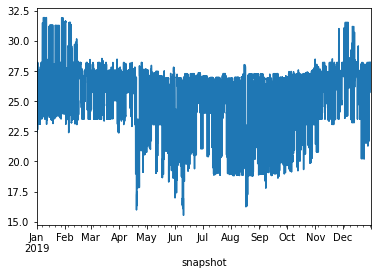

In [20]:
weighted_price.plot() #weighted price for Czech Republic generated by network

### Adding Actual Prices Data

Importing the data as a pandas dataframe and setting up the data inorder to merge it with the predicted prices for comparison.

In [26]:
start1 = pd.read_excel("E:\\Cerge-ei\\RA - electricity project\\pypsa-eur_v2\\2019_hourly_price_data_full.xlsx")
start1

,Date,Hour,czk,setup
0,2019-01-01,00:00:00,8.50,0
1,2019-01-01,01:00:00,3.97,1
2,2019-01-01,02:00:00,4.70,2
3,2019-01-01,03:00:00,0.93,3
4,2019-01-01,04:00:00,3.90,4
...,...,...,...,...
8755,2019-12-31,19:00:00,40.16,19
8756,2019-12-31,20:00:00,35.52,20
8757,2019-12-31,21:00:00,34.50,21
8758,2019-12-31,22:00:00,36.55,22


In [27]:
df = start1.drop(['setup'], axis = 1)
df["snapshot"] = df["Date"].astype(str) + " " + df["Hour"].astype(str)
df

,Date,Hour,czk,snapshot
0,2019-01-01,00:00:00,8.50,2019-01-01 00:00:00
1,2019-01-01,01:00:00,3.97,2019-01-01 01:00:00
2,2019-01-01,02:00:00,4.70,2019-01-01 02:00:00
3,2019-01-01,03:00:00,0.93,2019-01-01 03:00:00
4,2019-01-01,04:00:00,3.90,2019-01-01 04:00:00
...,...,...,...,...
8755,2019-12-31,19:00:00,40.16,2019-12-31 19:00:00
8756,2019-12-31,20:00:00,35.52,2019-12-31 20:00:00
8757,2019-12-31,21:00:00,34.50,2019-12-31 21:00:00
8758,2019-12-31,22:00:00,36.55,2019-12-31 22:00:00


In [28]:
df1 = df.drop(['Date', 'Hour'], axis = 1)
df1

,czk,snapshot
0,8.50,2019-01-01 00:00:00
1,3.97,2019-01-01 01:00:00
2,4.70,2019-01-01 02:00:00
3,0.93,2019-01-01 03:00:00
4,3.90,2019-01-01 04:00:00
...,...,...
8755,40.16,2019-12-31 19:00:00
8756,35.52,2019-12-31 20:00:00
8757,34.50,2019-12-31 21:00:00
8758,36.55,2019-12-31 22:00:00


In [29]:
df2 = df1.set_index('snapshot')
df2

,czk
snapshot,
2019-01-01 00:00:00,8.50
2019-01-01 01:00:00,3.97
2019-01-01 02:00:00,4.70
2019-01-01 03:00:00,0.93
2019-01-01 04:00:00,3.90
...,...
2019-12-31 19:00:00,40.16
2019-12-31 20:00:00,35.52
2019-12-31 21:00:00,34.50


In [30]:
df2.rename(columns = {'czk':'Actual'}, inplace = True)
df2

,Actual
snapshot,
2019-01-01 00:00:00,8.50
2019-01-01 01:00:00,3.97
2019-01-01 02:00:00,4.70
2019-01-01 03:00:00,0.93
2019-01-01 04:00:00,3.90
...,...
2019-12-31 19:00:00,40.16
2019-12-31 20:00:00,35.52
2019-12-31 21:00:00,34.50


In [31]:
df6 = weighted_price.to_frame() #converted weighted price data to dataframe
df6

,0
snapshot,
2019-01-01 00:00:00,25.991402
2019-01-01 01:00:00,26.024541
2019-01-01 02:00:00,22.635780
2019-01-01 03:00:00,22.378322
2019-01-01 04:00:00,22.378322
...,...
2019-12-31 19:00:00,28.177838
2019-12-31 20:00:00,26.023509
2019-12-31 21:00:00,26.018176


In [32]:
df6.rename(columns = {0:'Predicted'}, inplace = True)
df6

,Predicted
snapshot,
2019-01-01 00:00:00,25.991402
2019-01-01 01:00:00,26.024541
2019-01-01 02:00:00,22.635780
2019-01-01 03:00:00,22.378322
2019-01-01 04:00:00,22.378322
...,...
2019-12-31 19:00:00,28.177838
2019-12-31 20:00:00,26.023509
2019-12-31 21:00:00,26.018176


## For merging files


df2,data1 - data frame of actual data
df6,data2 - data frame of weighted price

Resetting index column for both data

In [33]:
data1 = df2
data1

,Actual
snapshot,
2019-01-01 00:00:00,8.50
2019-01-01 01:00:00,3.97
2019-01-01 02:00:00,4.70
2019-01-01 03:00:00,0.93
2019-01-01 04:00:00,3.90
...,...
2019-12-31 19:00:00,40.16
2019-12-31 20:00:00,35.52
2019-12-31 21:00:00,34.50


In [34]:
data1.reset_index(inplace=True)
data1

,snapshot,Actual
0,2019-01-01 00:00:00,8.50
1,2019-01-01 01:00:00,3.97
2,2019-01-01 02:00:00,4.70
3,2019-01-01 03:00:00,0.93
4,2019-01-01 04:00:00,3.90
...,...,...
8755,2019-12-31 19:00:00,40.16
8756,2019-12-31 20:00:00,35.52
8757,2019-12-31 21:00:00,34.50
8758,2019-12-31 22:00:00,36.55


In [35]:
data1.dtypes

snapshot     object
Actual      float64
dtype: object

In [36]:
data2 = df6
data2

,Predicted
snapshot,
2019-01-01 00:00:00,25.991402
2019-01-01 01:00:00,26.024541
2019-01-01 02:00:00,22.635780
2019-01-01 03:00:00,22.378322
2019-01-01 04:00:00,22.378322
...,...
2019-12-31 19:00:00,28.177838
2019-12-31 20:00:00,26.023509
2019-12-31 21:00:00,26.018176


In [37]:
data2.reset_index(inplace=True)
data2

,snapshot,Predicted
0,2019-01-01 00:00:00,25.991402
1,2019-01-01 01:00:00,26.024541
2,2019-01-01 02:00:00,22.635780
3,2019-01-01 03:00:00,22.378322
4,2019-01-01 04:00:00,22.378322
...,...,...
8755,2019-12-31 19:00:00,28.177838
8756,2019-12-31 20:00:00,26.023509
8757,2019-12-31 21:00:00,26.018176
8758,2019-12-31 22:00:00,26.011369


In [38]:
data2.dtypes

snapshot     datetime64[ns]
Predicted           float64
dtype: object

In [39]:
data1['snapshot'] = pd.to_datetime(data1['snapshot'], infer_datetime_format=True) #changing dates from object to datetime since column formats don't match
data1

,snapshot,Actual
0,2019-01-01 00:00:00,8.50
1,2019-01-01 01:00:00,3.97
2,2019-01-01 02:00:00,4.70
3,2019-01-01 03:00:00,0.93
4,2019-01-01 04:00:00,3.90
...,...,...
8755,2019-12-31 19:00:00,40.16
8756,2019-12-31 20:00:00,35.52
8757,2019-12-31 21:00:00,34.50
8758,2019-12-31 22:00:00,36.55


In [40]:
data1.dtypes

snapshot    datetime64[ns]
Actual             float64
dtype: object

In [41]:
finaldata = pd.concat([data2, data1], axis=1)
finaldata #merged data

,snapshot,Predicted,snapshot,Actual
0,2019-01-01 00:00:00,25.991402,2019-01-01 00:00:00,8.50
1,2019-01-01 01:00:00,26.024541,2019-01-01 01:00:00,3.97
2,2019-01-01 02:00:00,22.635780,2019-01-01 02:00:00,4.70
3,2019-01-01 03:00:00,22.378322,2019-01-01 03:00:00,0.93
4,2019-01-01 04:00:00,22.378322,2019-01-01 04:00:00,3.90
...,...,...,...,...
8755,2019-12-31 19:00:00,28.177838,2019-12-31 19:00:00,40.16
8756,2019-12-31 20:00:00,26.023509,2019-12-31 20:00:00,35.52
8757,2019-12-31 21:00:00,26.018176,2019-12-31 21:00:00,34.50
8758,2019-12-31 22:00:00,26.011369,2019-12-31 22:00:00,36.55


## Plot
data1,df2 = actual data (czk) #data2,df6 = weighted price (0)

<AxesSubplot:title={'center':'Predicted versus Actual Electricity Prices'}, xlabel='Time', ylabel='Price in Eur/MWH'>

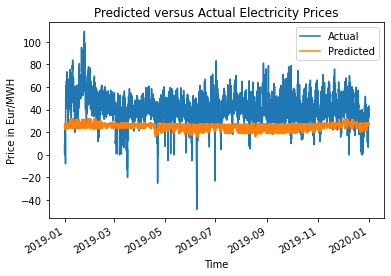

In [42]:
ax = data1.plot(x='snapshot', y='Actual')
data2.plot(ax=ax, x='snapshot', y = 'Predicted', ylabel = 'Price in Eur/MWH', xlabel = 'Time', title= 'Predicted versus Actual Electricity Prices')

Plotting total load

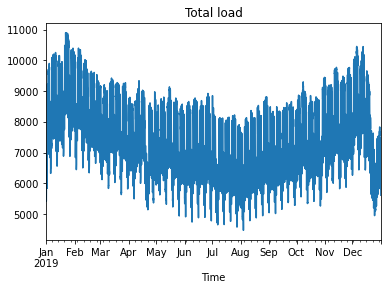

In [45]:
ax2 = sum_weight.plot(x='snapshot', y='data', ylabel = '', xlabel = 'Time', title= 'Total load')